**A1. Continue unfinished experiments (baseline models)**

Decision Tree Accuracy: 0.986322188449848
Logistic Regression Accuracy: 0.5835866261398176


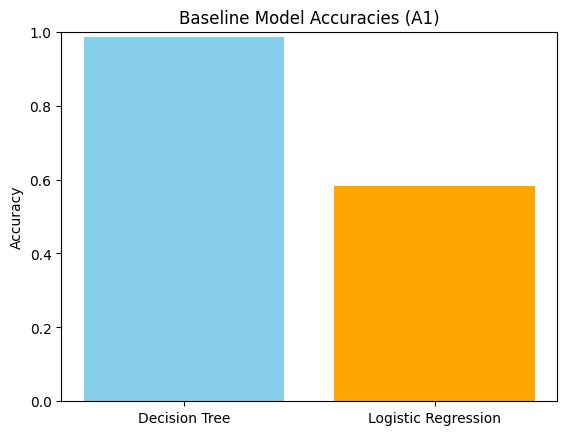

In [29]:
# A1: Train simple baseline models (Decision Tree & Logistic Regression)

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Load dataset
data = pd.read_csv("processed_fluency_dataset.csv")

# Function to clean numbers stored as strings like "[123]" → 123.0
def clean_numeric(value):
    if isinstance(value, str) and value.startswith("[") and value.endswith("]"):
        return float(value.strip("[]").split(",")[0])  # take first number
    return value

# Apply cleaning function to all columns
for column in data.columns:
    data[column] = data[column].apply(clean_numeric)

# Define features (X) and target (y)
X = data.drop(columns=["fluency", "filename", "student_id", "type", "fluency_encoded"])
y = data["fluency"]

# Fill missing numeric values with the median of each column
X = X.fillna(X.median(numeric_only=True))

# Split data into training (75%) and testing (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Initialize models
decision_tree = DecisionTreeClassifier(max_depth=5, random_state=1)
logistic_regression = LogisticRegression(max_iter=500, random_state=1)

# Train models
decision_tree.fit(X_train, y_train)
logistic_regression.fit(X_train, y_train)

# Evaluate models
dt_accuracy = decision_tree.score(X_test, y_test)
lr_accuracy = logistic_regression.score(X_test, y_test)

# Print accuracies
print("Decision Tree Accuracy:", dt_accuracy)
print("Logistic Regression Accuracy:", lr_accuracy)

# ---- Visualization ----
models = ["Decision Tree", "Logistic Regression"]
accuracies = [dt_accuracy, lr_accuracy]

plt.bar(models, accuracies, color=["skyblue", "orange"])
plt.ylabel("Accuracy")
plt.title("Baseline Model Accuracies (A1)")
plt.ylim(0, 1)
plt.show()

**A2 – Hyperparameter tuning with RandomizedSearchCV**

Best Parameters: {'n_estimators': 200, 'max_depth': 10}
Best CV Score: 0.997970573313039
Test Accuracy: 1.0


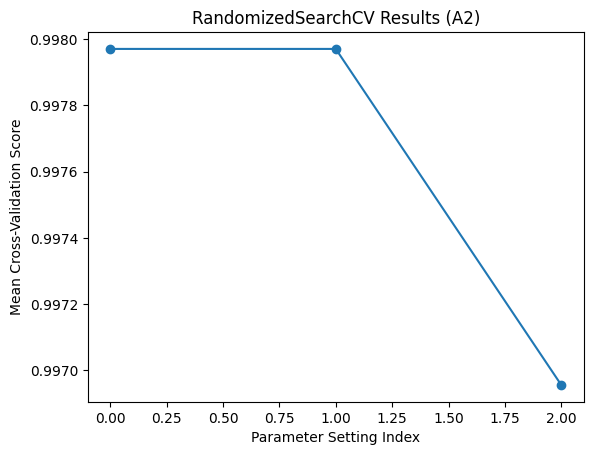

In [30]:
# A2: Hyperparameter tuning for RandomForest using RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
import pandas as pd

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=1)

# Define parameter grid for tuning
param_grid = {
    "n_estimators": [50, 100, 200],  # number of trees
    "max_depth": [None, 5, 10]       # max depth of trees
}

# Perform RandomizedSearchCV (randomly tests combinations)
random_search = RandomizedSearchCV(
    rf_model, param_grid, n_iter=3, cv=3, random_state=1
)

# Fit the search object on training data
random_search.fit(X_train, y_train)

# Print the best parameters and performance
print("Best Parameters:", random_search.best_params_)
print("Best CV Score:", random_search.best_score_)
print("Test Accuracy:", random_search.best_estimator_.score(X_test, y_test))

# ---- Visualization of CV results ----
cv_results_df = pd.DataFrame(random_search.cv_results_)
plt.plot(cv_results_df["mean_test_score"], marker="o")
plt.xlabel("Parameter Setting Index")
plt.ylabel("Mean Cross-Validation Score")
plt.title("RandomizedSearchCV Results (A2)")
plt.show()

**A3. Train several classifiers & tabulate Train/Test metrics**

          Model     Train      Test
0  DecisionTree  0.980213  0.986322
1  RandomForest  1.000000  1.000000
2      AdaBoost  0.974125  0.963526
3    NaiveBayes  0.809741  0.816109
4           MLP  0.610857  0.583587


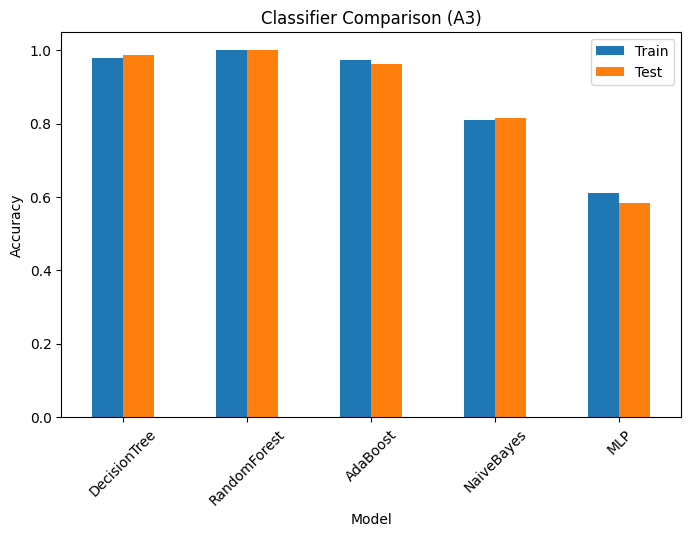

In [31]:
# A3: Compare performance of different classifiers (Decision Tree, Random Forest, AdaBoost, Naive Bayes, MLP)

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

# Dictionary of models to test
classifier_models = {
    "DecisionTree": DecisionTreeClassifier(max_depth=5),    # Simple Decision Tree
    "RandomForest": RandomForestClassifier(n_estimators=100), # Ensemble of decision trees
    "AdaBoost": AdaBoostClassifier(),                       # Boosting-based ensemble
    "NaiveBayes": GaussianNB(),                             # Naive Bayes classifier
    "MLP": MLPClassifier(max_iter=300)                      # Multi-layer Perceptron (Neural Net)
}

# List to store accuracy results
model_results = []

# Train and evaluate each model
for model_name, classifier in classifier_models.items():
    classifier.fit(X_train, y_train)  # Train model
    model_results.append({
        "Model": model_name,
        "Train": accuracy_score(y_train, classifier.predict(X_train)),  # Training accuracy
        "Test": accuracy_score(y_test, classifier.predict(X_test))      # Testing accuracy
    })

# Convert results to DataFrame for better readability
results_table = pd.DataFrame(model_results)
print(results_table)

# ---- Visualization: Compare train & test accuracy ----
results_table.plot(x="Model", y=["Train", "Test"], kind="bar", figsize=(8, 5))
plt.ylabel("Accuracy")
plt.title("Classifier Comparison (A3)")
plt.xticks(rotation=45)
plt.show()

**A4 – Regression (Not Applicable here)**

In [32]:
# A4: Regression is not applicable since this is classification
print("Not applicable (fluency is a class, not a number).")

Not applicable (fluency is a class, not a number).


**A5 – Clustering (KMeans, Agglomerative, DBSCAN)**

In [33]:
# A5: Apply different clustering algorithms (KMeans, Agglomerative, DBSCAN)

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler

# Step 1: Scale features for better clustering performance
scaler = StandardScaler()               # Standardize data (mean=0, std=1)
X_scaled = scaler.fit_transform(X)      # Use the cleaned feature matrix from A1

# Step 2: KMeans Clustering (3 clusters)
kmeans_model = KMeans(n_clusters=3, n_init=10, random_state=1)
kmeans_model.fit(X_scaled)
print("KMeans cluster labels:", set(kmeans_model.labels_))

# Step 3: Agglomerative Clustering (Hierarchical Clustering)
agg_model = AgglomerativeClustering(n_clusters=3)
agg_model.fit(X_scaled)
print("Agglomerative cluster labels:", set(agg_model.labels_))

# Step 4: DBSCAN Clustering (Density-Based)
dbscan_model = DBSCAN(eps=1.0, min_samples=5)
dbscan_model.fit(X_scaled)
print("DBSCAN clusters:", set(dbscan_model.labels_))

KMeans cluster labels: {np.int32(0), np.int32(1), np.int32(2)}
Agglomerative cluster labels: {np.int64(0), np.int64(1), np.int64(2)}
DBSCAN clusters: {np.int64(0), np.int64(-1)}


**O1. SHAP: feature importance for a tree model**

In [34]:
# O1: SHAP Global Feature Importance (Short Version)

!pip -q install shap
import pandas as pd, numpy as np, shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load & clean data
data = pd.read_csv("processed_fluency_dataset.csv")
data = data.applymap(lambda v: float(v.strip("[]").split(",")[0]) if isinstance(v, str) and "[" in v else v)
X, y = data.select_dtypes(include=[np.number]).fillna(data.median(numeric_only=True)), data["fluency"].astype(str)

# Train model
Xtr, Xte, ytr, yte = train_test_split(X, y, stratify=y, test_size=0.25, random_state=0)
model = RandomForestClassifier(random_state=0).fit(Xtr, ytr)

# SHAP analysis
explainer = shap.TreeExplainer(model)
shap_vals = explainer.shap_values(Xtr.sample(100, random_state=0))
importance = np.abs(shap_vals).mean(axis=(0,1))

# Top 5 features
print("Top features:", X.columns[np.argsort(-importance)[:5]].tolist())

/tmp/ipython-input-1394294076.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda v: float(v.strip("[]").split(",")[0]) if isinstance(v, str) and "[" in v else v)


Top features: ['zcr', 'duration', 'rms']


**O2. LIME: local explanation for one test sample**

In [35]:
# O2: Local Explanation with LIME (Short Version)

!pip -q install lime
import pandas as pd, numpy as np
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from lime.lime_tabular import LimeTabularExplainer

# Load & clean data
data = pd.read_csv("processed_fluency_dataset.csv")
data = data.applymap(lambda v: float(v.strip("[]").split(",")[0]) if isinstance(v, str) and "[" in v else v)
X, y = data.select_dtypes(include=[np.number]).fillna(data.median(numeric_only=True)), data["fluency"].astype(str)

# Train model
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=0)
model = make_pipeline(StandardScaler(), SVC(probability=True)).fit(X_train, y_train)

# LIME explanation for one sample
explainer = LimeTabularExplainer(X_train.values, feature_names=X.columns, class_names=sorted(y.unique()))
exp = explainer.explain_instance(X_test.iloc[0].values, model.predict_proba)
print("Top features:", exp.as_list()[:5])

/tmp/ipython-input-637800528.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda v: float(v.strip("[]").split(",")[0]) if isinstance(v, str) and "[" in v else v)


Top features: [('fluency_encoded <= 0.00', -0.024379244779886965), ('0.04 < zcr <= 0.05', 0.00783327253369696), ('0.02 < rms <= 0.03', 0.005346534744144283), ('3.21 < duration <= 6.46', -0.0047586287489231075), ('209.00 < student_id <= 223.00', 0.0025001822940417164)]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
